In [1]:
from fastai.vision.all import *
from fastai.callback import *

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
#SEED = 2042

seed_value = 403


random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)


torch.cuda.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value) # gpu vars
torch.backends.cudnn.deterministic = True  #needed
torch.backends.cudnn.benchmark = False

In [3]:
path = Path('/disks/data_03/datasets/Leukemia/ALL_IDB_Data_Code_Paper/ALL_IDB2/img')

In [4]:
files = get_image_files(path)
len(files)

260

In [5]:
def label_func(f): return int(os.path.splitext(f)[0][-1])

In [6]:
all_idxs = np.random.permutation(range(len(files)))

test_set_sz = int(len(all_idxs)*.15)
test_idxs = all_idxs[:test_set_sz]

train_val_set_idxs = all_idxs[test_set_sz:]



In [7]:
len(files[train_val_set_idxs])

221

In [8]:
dls = ImageDataLoaders.from_name_func(path, files[train_val_set_idxs], label_func, item_tfms = Resize(224))

In [9]:
# pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
#                  get_items=get_image_files, 
#                  splitter=RandomSplitter(),
#                  get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
#                  item_tfms=Resize(460),
#                  batch_tfms=aug_transforms(size=224))

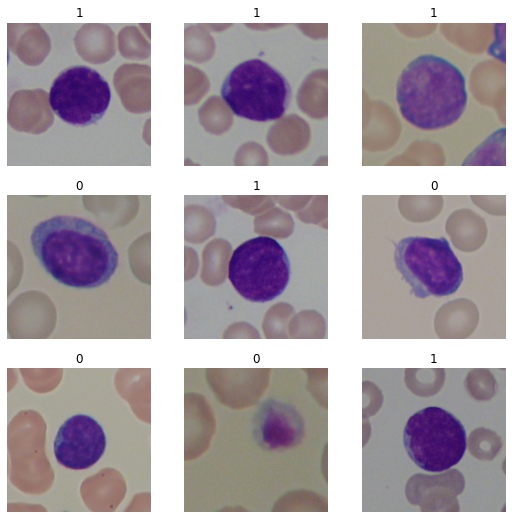

In [10]:
dls.show_batch()

In [11]:
resnet34_learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0010000000474974513)

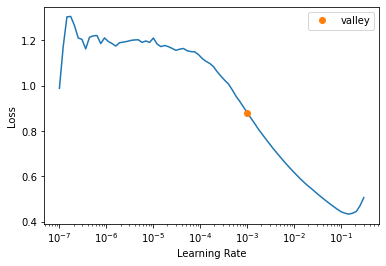

In [12]:
resnet34_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.216128,0.762247,0.568182,0.431818,00:01


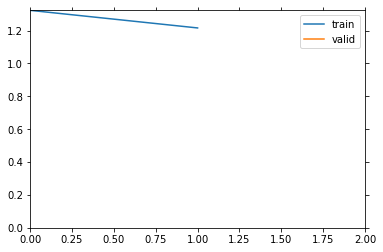

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.785237,0.731649,0.568182,0.431818,00:01
1,0.719572,0.751421,0.568182,0.431818,00:01
2,0.594809,0.783536,0.545455,0.454545,00:01
3,0.510762,0.793457,0.636364,0.363636,00:01
4,0.440253,0.760190,0.590909,0.409091,00:01
5,0.381048,0.683284,0.681818,0.318182,00:01
6,0.328070,0.569364,0.750000,0.250000,00:01
7,0.286474,0.477106,0.772727,0.227273,00:01
8,0.251361,0.431053,0.840909,0.159091,00:01
9,0.224074,0.379826,0.886364,0.113636,00:01


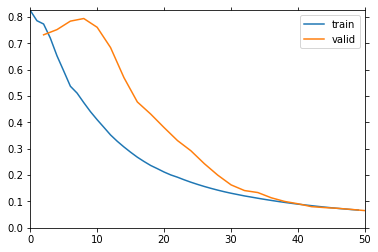

In [13]:
resnet34_learn.fine_tune(25, 1e-3)

In [14]:

preds_gt = [(resnet34_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [15]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.90      1.00      0.95        18

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39

1.0 0.9047619047619048


In [16]:
resnet50_learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0005754399462603033)

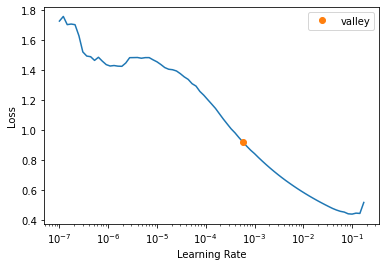

In [17]:
resnet50_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.304016,0.880723,0.454545,0.545455,00:01


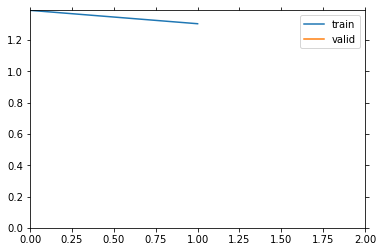

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.804072,0.841398,0.545455,0.454545,00:01
1,0.687865,0.775411,0.545455,0.454545,00:01
2,0.583216,0.682401,0.659091,0.340909,00:01
3,0.551541,0.584592,0.704545,0.295455,00:01
4,0.470242,0.503496,0.727273,0.272727,00:01
5,0.396463,0.491859,0.750000,0.250000,00:01
6,0.341834,0.516973,0.750000,0.250000,00:01
7,0.302616,0.544698,0.772727,0.227273,00:01
8,0.265313,0.585640,0.772727,0.227273,00:01
9,0.234322,0.617094,0.772727,0.227273,00:01


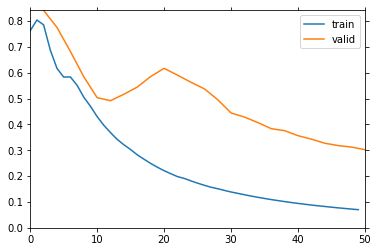

In [18]:
resnet50_learn.fine_tune(25, 4e-4)

In [19]:

preds_gt = [(resnet50_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [20]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9743589743589743
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        18

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

1.0 0.9523809523809523


In [21]:
resnet101_learn = cnn_learner(dls, resnet101, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0002754228771664202)

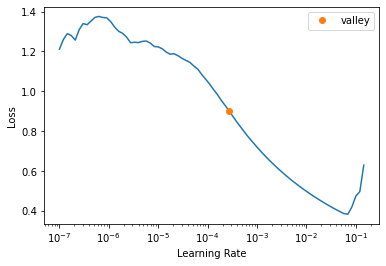

In [22]:
resnet101_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.278588,1.231857,0.522727,0.477273,00:01


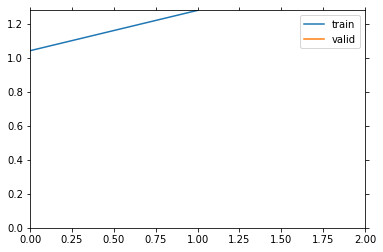

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.007716,1.062865,0.545455,0.454545,00:02
1,0.983435,0.869957,0.568182,0.431818,00:01
2,0.876775,0.720393,0.590909,0.409091,00:01
3,0.783186,0.624738,0.613636,0.386364,00:02
4,0.689690,0.474450,0.681818,0.318182,00:01
5,0.610329,0.423838,0.750000,0.250000,00:01
6,0.543132,0.436508,0.704545,0.295455,00:01
7,0.476137,0.443422,0.750000,0.250000,00:01
8,0.419764,0.450220,0.772727,0.227273,00:02
9,0.372332,0.599515,0.795455,0.204545,00:01


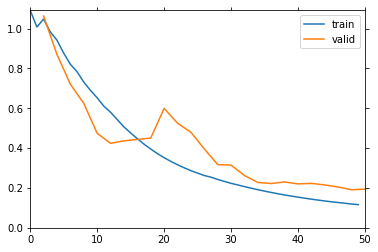

In [23]:
resnet101_learn.fine_tune(25, 2e-4)

In [24]:
preds_gt = [(resnet101_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [25]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.82      1.00      0.90        18

    accuracy                           0.90        39
   macro avg       0.91      0.90      0.90        39
weighted avg       0.92      0.90      0.90        39

1.0 0.8095238095238095


In [26]:
vgg16_learn = cnn_learner(dls, vgg16_bn, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0006918309954926372)

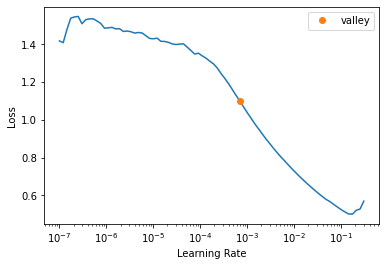

In [27]:
vgg16_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.609928,0.797171,0.522727,0.477273,00:02


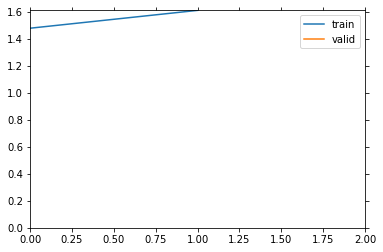

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.859635,0.769667,0.500000,0.500000,00:02
1,0.867902,0.736747,0.454545,0.545455,00:01
2,0.738629,0.687133,0.477273,0.522727,00:01
3,0.648809,0.622271,0.545455,0.454545,00:01
4,0.546600,0.542320,0.636364,0.363636,00:01
5,0.461624,0.449788,0.840909,0.159091,00:01
6,0.397740,0.372567,0.909091,0.090909,00:01
7,0.344628,0.310314,0.909091,0.090909,00:01
8,0.303547,0.259910,0.954545,0.045455,00:01
9,0.268256,0.217475,0.954545,0.045455,00:01


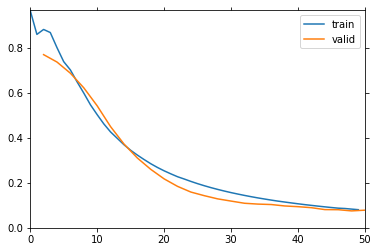

In [28]:
vgg16_learn.fine_tune(25, 1e-3)

In [29]:
preds_gt = [(vgg16_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [30]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9743589743589743
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        18

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

1.0 0.9523809523809523


In [31]:
vgg19_learn = cnn_learner(dls, vgg19_bn, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0008317637839354575)

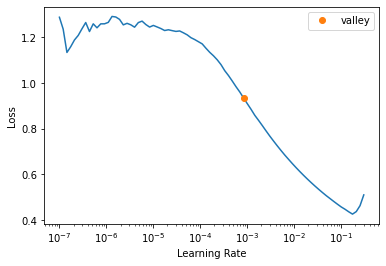

In [32]:
vgg19_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.337836,0.900653,0.500000,0.500000,00:01


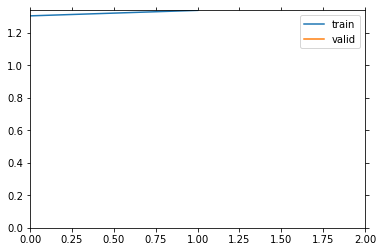

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.924021,0.828457,0.477273,0.522727,00:01
1,0.930589,0.745198,0.568182,0.431818,00:01
2,0.879188,0.669854,0.613636,0.386364,00:01
3,0.809694,0.616245,0.636364,0.363636,00:02
4,0.748146,0.557793,0.727273,0.272727,00:02
5,0.655158,0.488568,0.818182,0.181818,00:02
6,0.584987,0.434841,0.863636,0.136364,00:02
7,0.517863,0.383114,0.863636,0.136364,00:02
8,0.460742,0.337411,0.909091,0.090909,00:02
9,0.413230,0.296807,0.909091,0.090909,00:02


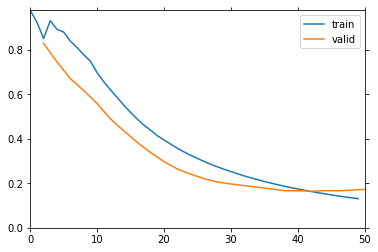

In [33]:
vgg19_learn.fine_tune(25, 5e-4)

In [34]:
preds_gt = [(vgg19_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [35]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9230769230769231
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.89      0.94      0.92        18

    accuracy                           0.92        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.92      0.92      0.92        39

0.9444444444444444 0.9047619047619048


In [36]:
densenet121_learn = cnn_learner(dls, densenet121, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0004786300996784121)

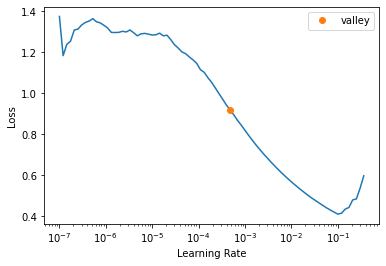

In [37]:
densenet121_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.208104,1.037458,0.477273,0.522727,00:01


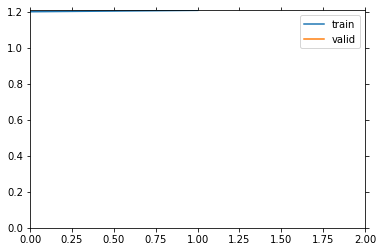

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.834105,0.869976,0.431818,0.568182,00:02
1,0.662491,0.844618,0.477273,0.522727,00:01
2,0.547815,0.806188,0.568182,0.431818,00:01
3,0.474779,0.798777,0.613636,0.386364,00:01
4,0.433435,0.843784,0.590909,0.409091,00:01
5,0.379757,0.877755,0.590909,0.409091,00:01
6,0.342048,0.906226,0.590909,0.409091,00:01
7,0.299268,0.908093,0.590909,0.409091,00:01
8,0.262939,0.919959,0.568182,0.431818,00:01
9,0.234114,0.869856,0.545455,0.454545,00:01


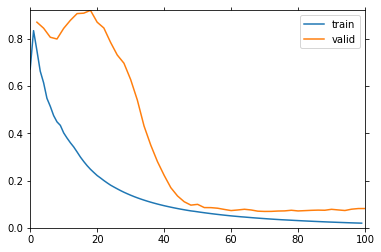

In [38]:
densenet121_learn.fine_tune(50, 1e-3)

In [39]:

preds_gt = [(densenet121_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [40]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9743589743589743
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        18

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

1.0 0.9523809523809523


In [41]:
densenet201_learn = cnn_learner(dls, densenet201, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0005754399462603033)

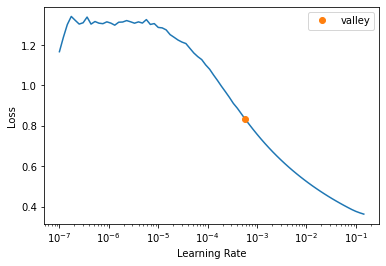

In [42]:
densenet201_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.316911,1.766119,0.477273,0.522727,00:02


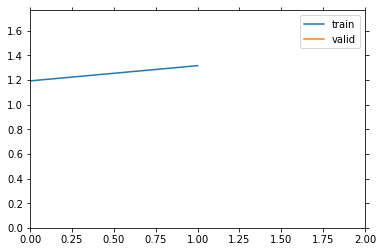

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.928098,1.099249,0.477273,0.522727,00:02
1,0.948003,0.785572,0.613636,0.386364,00:02
2,1.034557,0.803616,0.590909,0.409091,00:02
3,0.983289,0.980999,0.477273,0.522727,00:02
4,0.924296,1.213090,0.500000,0.500000,00:02
5,0.845587,1.350274,0.500000,0.500000,00:02
6,0.795735,1.490694,0.522727,0.477273,00:02
7,0.743877,1.586859,0.522727,0.477273,00:02
8,0.686852,1.575614,0.522727,0.477273,00:02
9,0.634359,1.546911,0.522727,0.477273,00:02


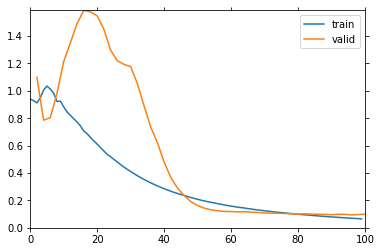

In [43]:
densenet201_learn.fine_tune(50, 2e-4)

# sensisivity, specificity, accuracy, seed, clf


In [44]:

preds_gt = [(densenet201_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]

In [45]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9487179487179487
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.94      0.94      0.94        18

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39

0.9444444444444444 0.9523809523809523


In [46]:
# Densenet201
# sens               spec                    accu                    SEED
# 0.9565217391304348 0.9655172413793104      0.9615384615384616      403

In [47]:
len(dls.valid_ds)

44

In [48]:
1/41

0.024390243902439025

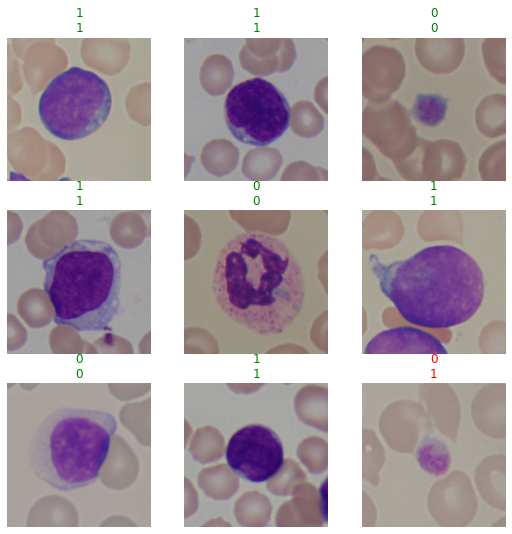

In [49]:
densenet121_learn.show_results()

In [50]:
interp = Interpretation.from_learner(densenet121_learn)

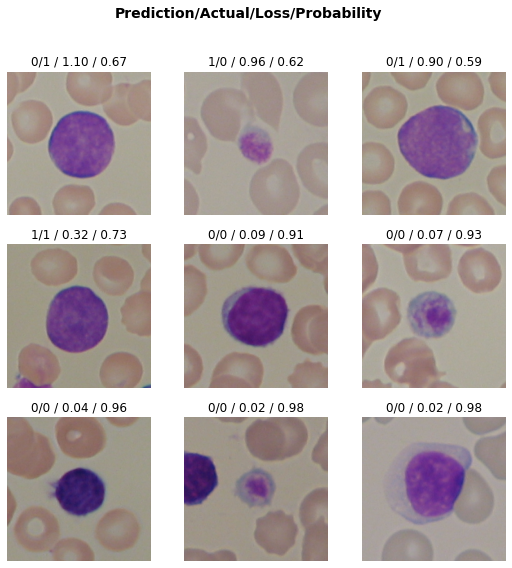

In [51]:
interp.plot_top_losses(k=9)

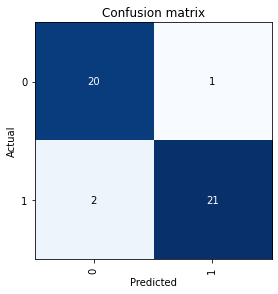

In [52]:
class_interp = ClassificationInterpretation.from_learner(densenet121_learn)
class_interp.plot_confusion_matrix()

In [53]:
# class Hook():
#     def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [54]:
# hook_output = Hook()
# hook = learn.model[0].register_forward_hook(hook_output.hook_func)

In [55]:
# https://github.com/fastai/fastbook/blob/master/18_CAM.ipynb
# https://forums.fast.ai/t/any-gradcam-heatmap-code-available-for-v2/63060